# Objectives:

-> To understand what factors contributed most to employee turnover.

-> To perform clustering to find any meaningful patterns of employee traits.

-> To create a model that predicts the likelihood if a certain employee will leave the company or not.

The implementation of this model will allow management to create better decision-making actions.

# Problem:

One of the most common problems at work is turnover.

Replacing a worker earning average salary cost the company about 20% of that worker’s yearly income according to the Center of American Progress.
Replacing a high-level employee can cost multiple of that...

Cost include:

* Cost of off-boarding
* Cost of hiring (advertising, interviewing, hiring)
* Cost of onboarding a new person (training, management time)
* Lost productivity (a new person may take 1-2 years to reach the productivity of an existing person)

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [42]:
df = pd.read_csv('HR_comma_sep.csv')

In [43]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [44]:
df.shape

(14999, 10)

In [45]:
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

In [46]:
df.head()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [47]:
round(df.turnover.value_counts(1), 2)

0    0.76
1    0.24
Name: turnover, dtype: float64

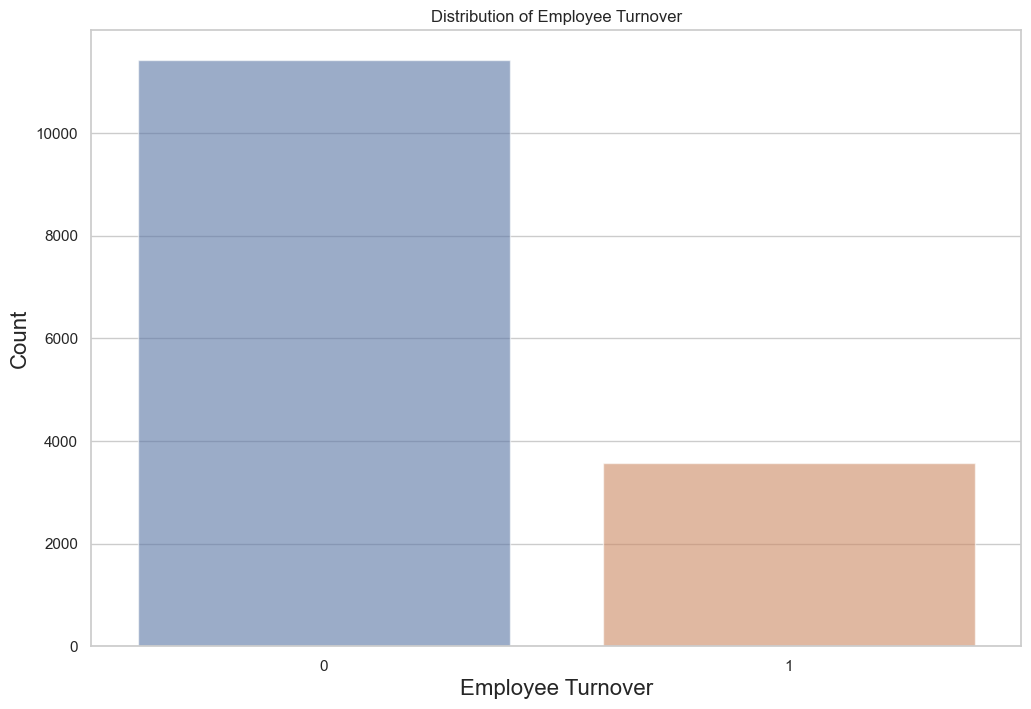

In [48]:
plt.figure(figsize=(12,8))
turnover = df.turnover.value_counts()
sns.barplot(y=turnover.values, x=turnover.index, alpha=0.6)
plt.title('Distribution of Employee Turnover')
plt.xlabel('Employee Turnover', fontsize=16)
plt.ylabel('Count', fontsize=16);

In [49]:
df.isnull().any()

satisfaction           False
evaluation             False
projectCount           False
averageMonthlyHours    False
yearsAtCompany         False
workAccident           False
turnover               False
promotion              False
Department             False
salary                 False
dtype: bool

In [50]:
df.dtypes

satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
turnover                 int64
promotion                int64
Department              object
salary                  object
dtype: object

# Exploratory Data Analysis

In [51]:
round(df.describe(), 2)

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,0.61,0.72,3.80,201.05,3.50,0.14,0.24,0.02
std,0.25,0.17,1.23,49.94,1.46,0.35,0.43,0.14
min,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00
25%,0.44,0.56,3.00,156.00,3.00,0.00,0.00,0.00
50%,0.64,0.72,4.00,200.00,3.00,0.00,0.00,0.00
75%,0.82,0.87,5.00,245.00,4.00,0.00,0.00,0.00
max,1.00,1.00,7.00,310.00,10.00,1.00,1.00,1.00


In [52]:
turnover_Summary = df.groupby('turnover')
round(turnover_Summary.mean(), 2)

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.67,0.72,3.79,199.06,3.38,0.18,0.03
1,0.44,0.72,3.86,207.42,3.88,0.05,0.01


In [53]:
round(turnover_Summary.std(), 2)

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.22,0.16,0.98,45.68,1.56,0.38,0.16
1,0.26,0.20,1.82,61.20,0.98,0.21,0.07


In [54]:
corr = df.corr()
corr

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion
satisfaction,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
projectCount,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
averageMonthlyHours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
yearsAtCompany,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
workAccident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
turnover,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


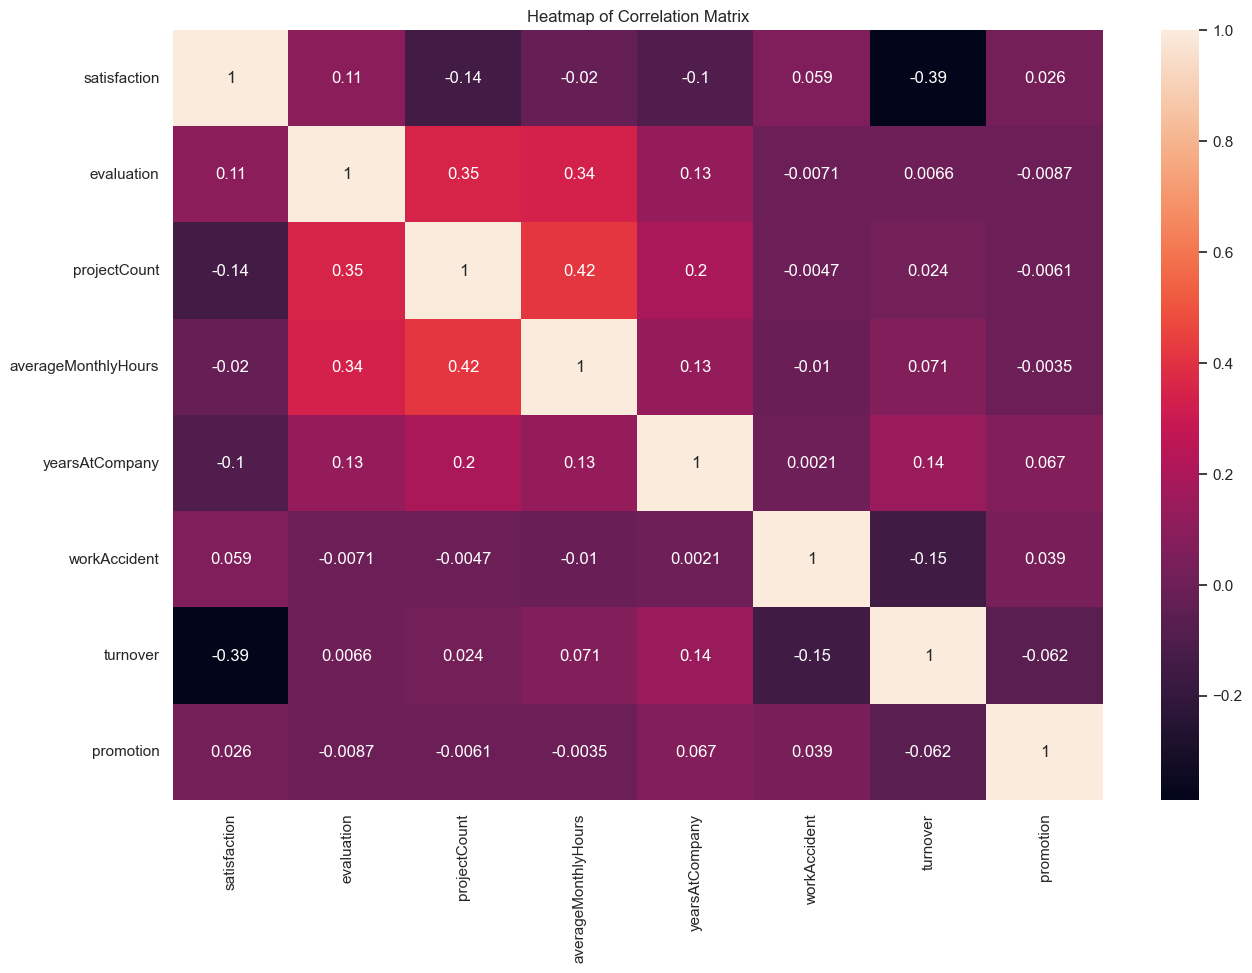

In [55]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)
plt.title('Heatmap of Correlation Matrix');

# Distribution of Satisfaction, Evaluation, and Monthly Hours

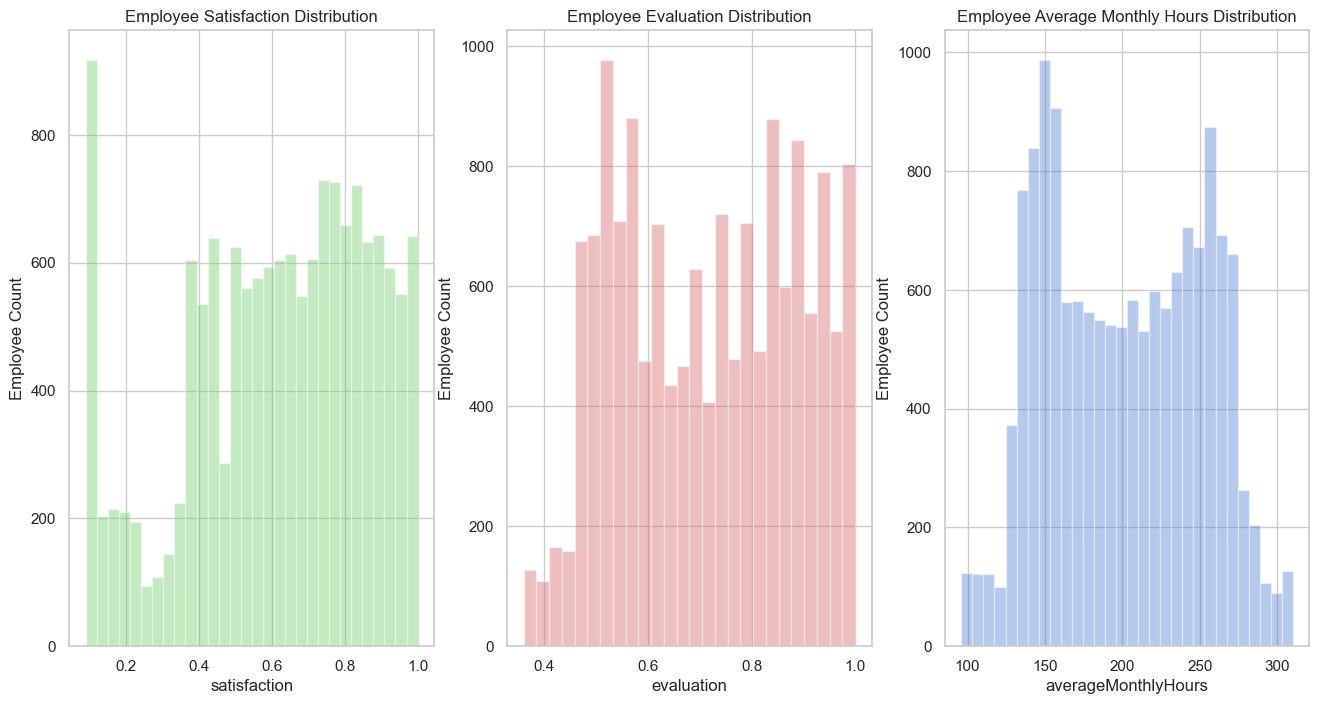

In [56]:
f, axes = plt.subplots(ncols=3, figsize=(16, 8))

sns.distplot(df.satisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count');

sns.distplot(df.evaluation, kde=False, color="r", ax=axes[1]).set_title('Employee Evaluation Distribution')
axes[1].set_ylabel('Employee Count');

sns.distplot(df.averageMonthlyHours, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count');

# Satisfaction VS Evaluation

<Figure size 1500x1000 with 0 Axes>

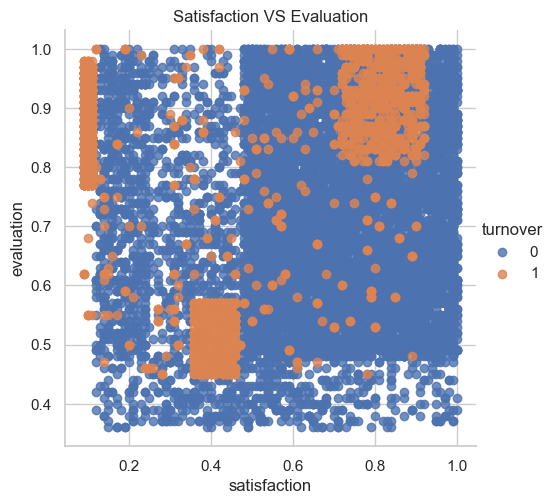

In [57]:
plt.figure(figsize=(15,10))
sns.lmplot(x='satisfaction', y='evaluation', data=df, fit_reg=False, hue='turnover') 
plt.title('Satisfaction VS Evaluation');

# K-Means Clustering of Employee Turnover

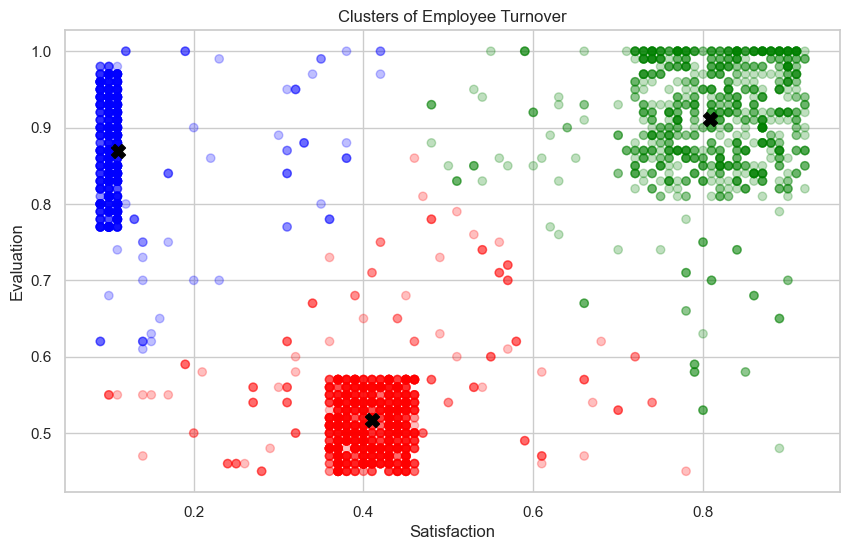

In [58]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df[df.turnover==1][["satisfaction","evaluation"]])

kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaction",y="evaluation", data=df[df.turnover==1],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")

plt.show();

There are 3 distinct clusters for employees who left the company

Cluster 1: (Hard-working and Sad Employee): Satisfaction was below 0.2 and evaluations were greater than 0.75. Which could be a good indication that employees who left the company were good workers but felt horrible at their job.

Cluster 2: (Bad and Sad Employee): Satisfaction between about 0.35~0.45 and evaluations below ~0.58. This could be seen as employees who were badly evaluated and felt bad at work.

Cluster 3: (Hard-working and Happy Employee): Satisfaction between 0.7~1.0 and evaluations were greater than 0.8. Which could mean that employees in this cluster were "ideal". They loved their work and were evaluated highly for their performance.


# Employee Satisfaction

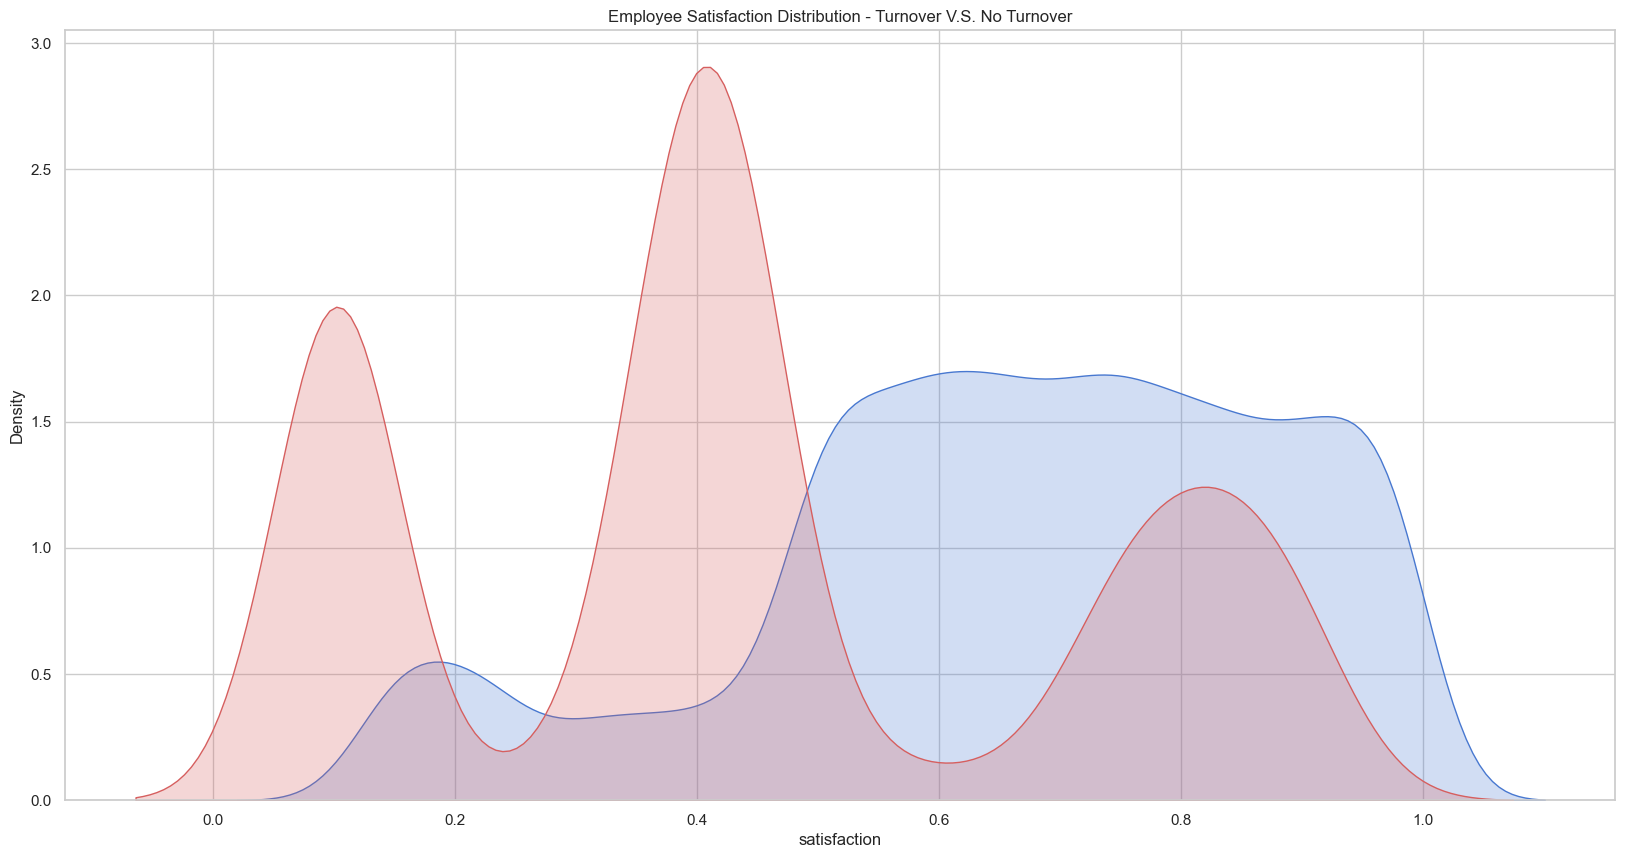

In [59]:
fig = plt.figure(figsize=(20,10))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'satisfaction'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'satisfaction'] , color='r',shade=True, label='turnover')
plt.title('Employee Satisfaction Distribution - Turnover V.S. No Turnover');

* Employees who had really low satisfaction levels (0.2 or less) left the company more
* Employees who had low satisfaction levels (0.3~0.5) left the company more
* Employees who had really high satisfaction levels (0.7 or more) left the company more

# Employee Department Distribution

In [60]:
hrleft = df[df['turnover']==1]

hrleft = pd.DataFrame(hrleft.Department.value_counts()).reset_index()
hrstay = pd.DataFrame(df.Department.value_counts()).reset_index()

hr_merge = pd.merge(hrleft, hrstay, how='inner', on='index')

hr_merge = hr_merge.rename(columns={"Department_x":'left', "Department_y":'stay', "index":'department' })
hr_merge

,department,left,stay
0,sales,1014,4140
1,technical,697,2720
2,support,555,2229
3,IT,273,1227
4,hr,215,739
5,accounting,204,767
6,marketing,203,858
7,product_mng,198,902
8,RandD,121,787
9,management,91,630


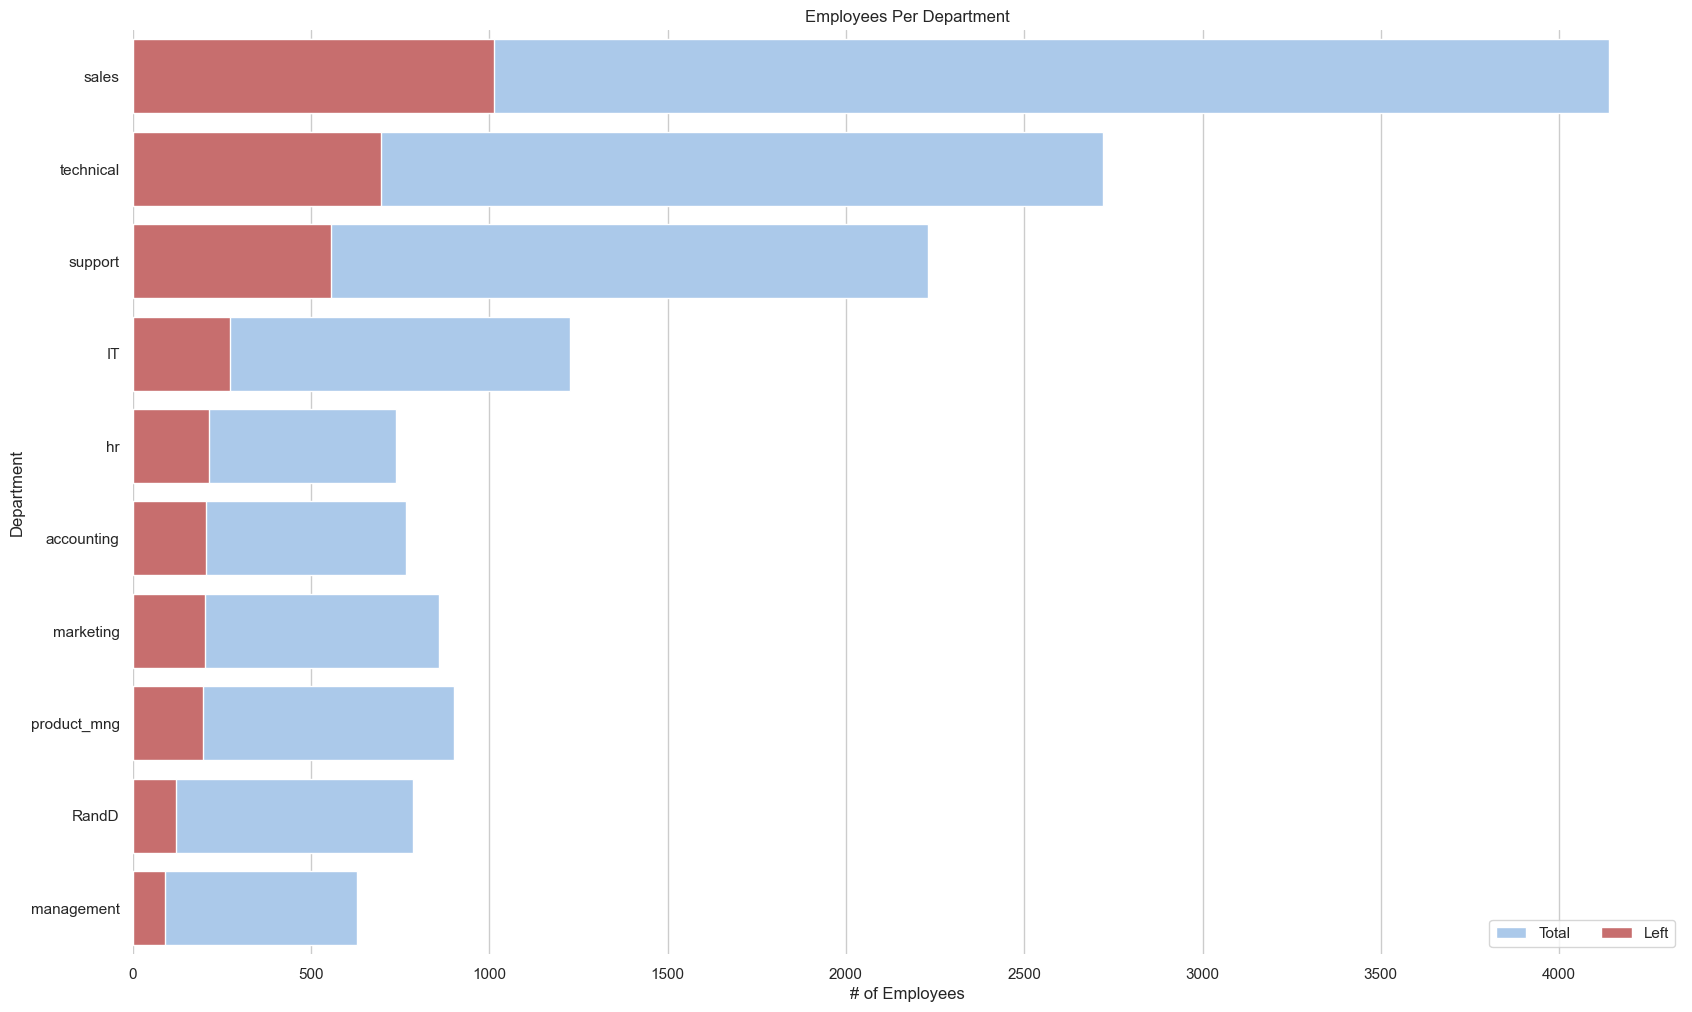

In [61]:
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(20, 12))

sns.set_color_codes("pastel")
sns.barplot(x="stay", y='department', data=hr_merge,
            label="Total", color="b")

sns.set_color_codes("muted")
sns.barplot(x="left", y="department", data=hr_merge,
            label="Left", color="r")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="Department", title='Employees Per Department',
       xlabel="# of Employees")
sns.despine(left=True, bottom=True);

# Average Monthly Hours

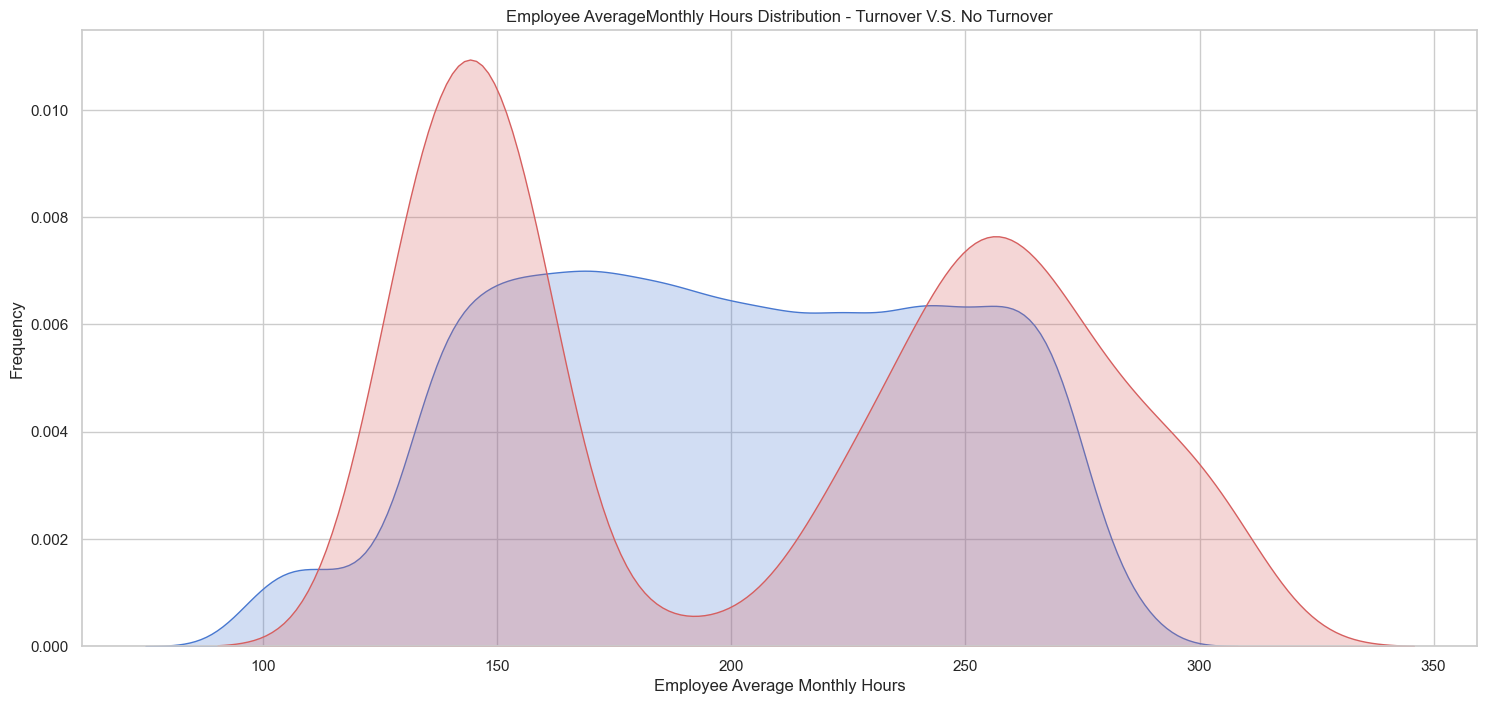

In [62]:
fig = plt.figure(figsize=(18, 8))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'averageMonthlyHours'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'averageMonthlyHours'] , color='r',shade=True, label='turnover')
ax.set(xlabel='Employee Average Monthly Hours', ylabel='Frequency')
plt.title('Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover');

* Employees who had less hours of work (~150hours or less) left the company more
* Employees who had too many hours of work (~250 or more) left the company
* Employees who left generally were underworked or overworked.

# Pre-processing

Apply get_dummies() to the categorical variables.
Seperate categorical variables and numeric variables, then combine them.

In [63]:
cat_var = ['Department','salary','turnover','promotion']
num_var = ['satisfaction','evaluation','projectCount','averageMonthlyHours','yearsAtCompany', 'workAccident']
categorical_df = pd.get_dummies(df[cat_var], drop_first=True, dummy_na=True)
numerical_df = df[num_var]

new_df = pd.concat([categorical_df,numerical_df], axis=1)
new_df.head()

,turnover,promotion,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,...,Department_nan,salary_low,salary_medium,salary_nan,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident
0,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0.38,0.53,2,157,3,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0.80,0.86,5,262,6,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0.11,0.88,7,272,4,0
3,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0.72,0.87,5,223,5,0
4,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0.37,0.52,2,159,3,0


In [64]:
new_df.shape


(14999, 21)

# Split Train/Test Set

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve

In [66]:
X = new_df.iloc[:,1:]
y = new_df.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=123, stratify=y)

In [67]:
print(X_train.shape)
print(X_test.shape)

(11249, 20)
(3750, 20)


# Train Logistic Regression Model

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


lr = LogisticRegression(class_weight='balanced')

lr.fit(X_train, y_train)
print ("Logistic accuracy is %2.2f" % accuracy_score(y_test, lr.predict(X_test)))


Logistic accuracy is 0.76


In [69]:
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7,shuffle=True)

lrCV = LogisticRegression()

scoring = 'roc_auc'

lr_results = model_selection.cross_val_score(lrCV, X_train, y_train, cv=kfold, scoring=scoring)
lr_results

array([0.81574996, 0.83028716, 0.79455491, 0.82082401, 0.83576429,
       0.78893079, 0.80649341, 0.81759036, 0.81709794, 0.81511752])

In [70]:
confusion_matrix(y_test, lr.predict(X_test))


array([[2154,  703],
       [ 195,  698]])

In [71]:
from sklearn.metrics import roc_auc_score

print ("\n\n ---Logistic Regression Model---")
lr_auc = roc_auc_score(y_test, lr.predict(X_test))
print ("Logistic Regression AUC = %2.2f" % lr_auc)
print(classification_report(y_test, lr.predict(X_test)))



 ---Logistic Regression Model---
Logistic Regression AUC = 0.77
              precision    recall  f1-score   support

           0       0.92      0.75      0.83      2857
           1       0.50      0.78      0.61       893

    accuracy                           0.76      3750
   macro avg       0.71      0.77      0.72      3750
weighted avg       0.82      0.76      0.78      3750



# Train Random Forest Classifier Model

In [72]:

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    class_weight="balanced"
    )

rf = rf.fit(X_train, y_train)

In [73]:
rf_results = model_selection.cross_val_score(rf, X_train, y_train, cv=kfold, scoring=scoring)
rf_results

array([0.98867457, 0.99296711, 0.99233702, 0.99239759, 0.99337327,
       0.99462865, 0.99172512, 0.99388609, 0.99444365, 0.98636262])

In [74]:
confusion_matrix(y_test, rf.predict(X_test))

array([[2850,    7],
       [  24,  869]])

In [75]:
from sklearn.metrics import roc_auc_score

print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))



 ---Random Forest Model---
Random Forest AUC = 0.99
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2857
           1       0.99      0.97      0.98       893

    accuracy                           0.99      3750
   macro avg       0.99      0.99      0.99      3750
weighted avg       0.99      0.99      0.99      3750



# Support Vector Classifier

In [76]:

from sklearn.svm import SVC 

svclassifier = SVC(kernel='rbf', probability=True)  

svc = svclassifier.fit(X_train,y_train)

In [77]:
%%time
svc_result = model_selection.cross_val_score(svc, X_train, y_train, cv=kfold, scoring=scoring)
svc_result

CPU times: user 5min 47s, sys: 4.68 s, total: 5min 52s
Wall time: 5min 52s


array([0.80587421, 0.81915741, 0.80568334, 0.81025564, 0.818675  ,
       0.80208306, 0.83207876, 0.80020155, 0.81615789, 0.80280449])

In [78]:
confusion_matrix(y_test, svc.predict(X_test))

array([[2857,    0],
       [ 835,   58]])

In [79]:
from sklearn.metrics import roc_auc_score

print ("\n\n ---Support Vector Model---")
svc_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Support Vector Classifier AUC = %2.2f" % svc_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))



 ---Support Vector Model---
Support Vector Classifier AUC = 0.99
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2857
           1       0.99      0.97      0.98       893

    accuracy                           0.99      3750
   macro avg       0.99      0.99      0.99      3750
weighted avg       0.99      0.99      0.99      3750



# ROC Graph

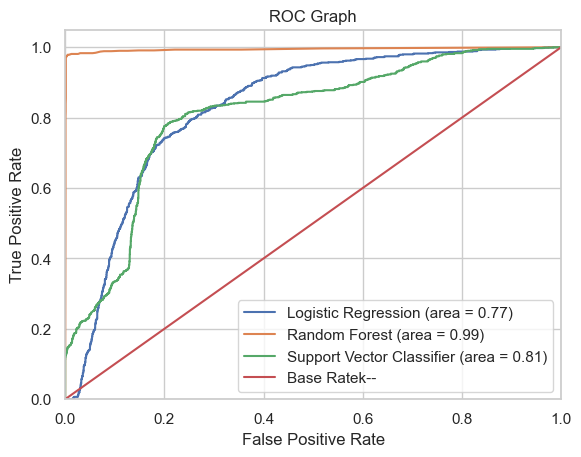

In [80]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
svc_fpr, svc_tpr, svc_thresholds = roc_curve(y_test, svc.predict_proba(X_test)[:,1])


plt.figure()

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_auc)

rf_auc = rf_results.mean()
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_auc)

svc_auc = svc_result.mean()
plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier (area = %0.2f)' % svc_auc)

plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

# Random Forest Feature Importances

In [81]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()
feature_importances

,index,importance
0,satisfaction,0.262873
1,yearsAtCompany,0.228241
2,projectCount,0.164575
3,averageMonthlyHours,0.148820
4,evaluation,0.142663
5,workAccident,0.013592
6,salary_low,0.009810
7,salary_medium,0.005180
8,Department_technical,0.004624
9,Department_sales,0.004173


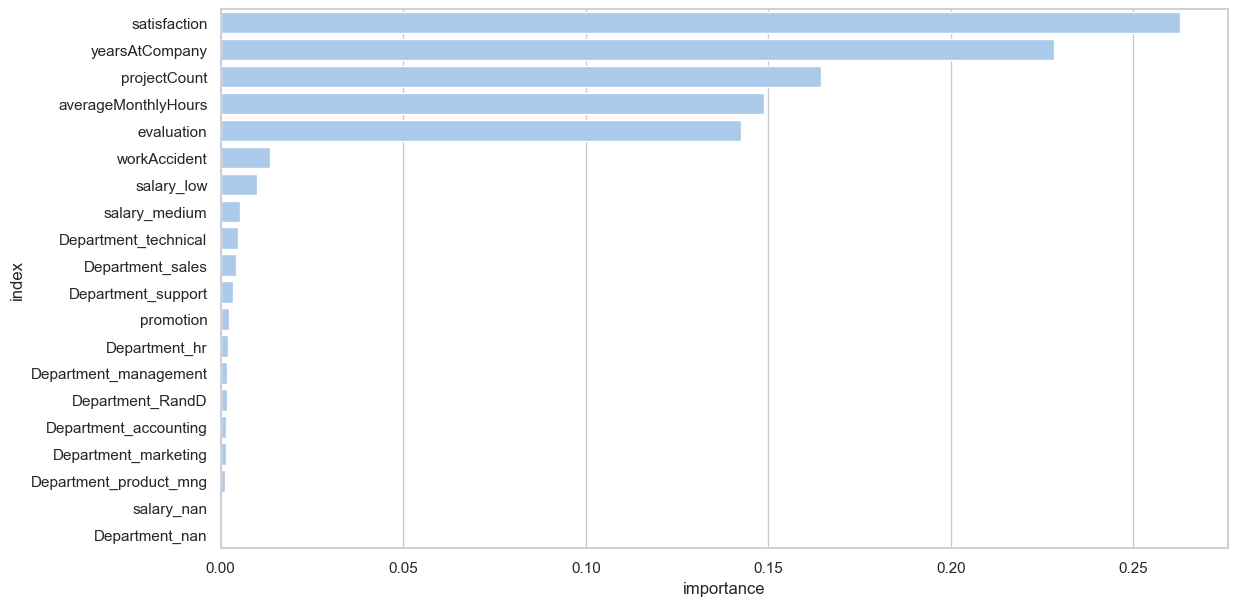

In [82]:
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(13, 7))

sns.set_color_codes("pastel")
sns.barplot(x="importance", y='index', data=feature_importances,
            label="Total", color="b")

In [83]:
rf.predict_proba(X_test)[175:200,1]

array([0.  , 1.  , 0.  , 0.04, 1.  , 1.  , 0.04, 0.01, 0.03, 0.01, 0.05,
       0.  , 0.05, 0.03, 0.02, 1.  , 0.02, 0.  , 0.05, 0.34, 0.  , 1.  ,
       1.  , 0.  , 0.02])

In [84]:
rf.predict(X_test)[100:101,]

array([0])

In [85]:
list(rf.predict_proba(X_test)[175:185, 1] > 0.2)

[False, True, False, False, True, True, False, False, False, False]